In [35]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tqdm import tqdm
from PIL import Image


import os
import pandas as pd
import numpy as np

In [36]:
train_dir = 'images/train'
test_dir = 'images/test'

In [37]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [38]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [39]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [40]:
test=pd.DataFrame()
test['image'],test['label']=createdataframe(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [41]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48,48,1)
    return features

In [42]:
train_features=extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

100%|██████████| 28821/28821 [06:47<00:00, 70.75it/s] 


In [43]:
test_features=extract_features(test['image'])

100%|██████████| 7066/7066 [01:32<00:00, 76.20it/s]


In [51]:
x_train = train_features/255.0
x_test = test_features/255.0

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()
le.fit(list(train['label']) + list(test['label']))

LabelEncoder()

In [54]:
y_train=le.transform(train['label'])

y_test=le.transform(test['label'])

In [55]:
num_classes = len(le.classes_)

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [56]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Optional:if input is still big enough
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # <-- padding added
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))


C:\Users\jackk\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_split=0.2)  

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.2810 - loss: 1.6868 - val_accuracy: 0.0000e+00 - val_loss: 3.8040
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.3064 - loss: 1.6307 - val_accuracy: 0.0000e+00 - val_loss: 4.7425
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.3091 - loss: 1.6090 - val_accuracy: 0.0000e+00 - val_loss: 5.2703
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.3457 - loss: 1.5652 - val_accuracy: 0.0000e+00 - val_loss: 5.9263
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.4249 - loss: 1.4388 - val_accuracy: 0.0000e+00 - val_loss: 5.5159
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.4636 - loss: 1.3500 - val_accuracy: 0.0000e+00 - val_loss: 7.4679
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.4963 - loss: 1.2783 - val_accuracy: 0.0109 - val_loss: 7.4031
Epoch 8/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 

In [ ]:
model_json = model.to_json()
with open("emotionmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotionmodel.h5")
model.save("emotionmodel.keras")

In [61]:
from keras.models import model_from_json

In [62]:
json_file = open('emotionmodel.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotionmodel.h5")

In [63]:
label=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] 

In [64]:
def ef(img):
    img = load_img(img,color_mode='grayscale')
    img = np.array(img)
    img = img.reshape(1, 48, 48, 1)
    img = img/255.0
    return img

In [ ]:
# Test the model with a sample image
0
scikit
DSdsA

# image = 'images/train/happy/7.jpg'
# print("Original Image: Happy")
# img=ef(image)
# pred=model.predict(img)
# pred_label=label[np.argmax(pred)]
# print("Predicted Label: ",pred_label)

Original Image: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Label:  happy


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

Original Image: Fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Label:  fear


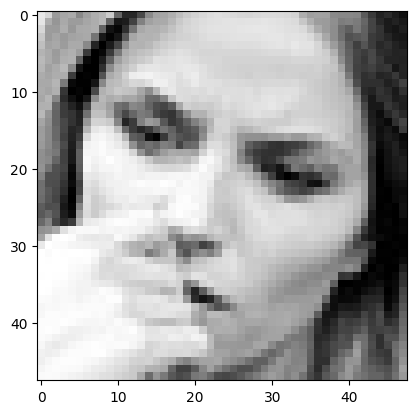

In [71]:
image = 'images/train/fear/2.jpg'
print("Original Image: Fear")
img=ef(image)
pred=model.predict(img)
pred_label=label[np.argmax(pred)]
print("Predicted Label: ",pred_label)
plt.imshow(img[0].reshape(48,48), cmap='gray')